### Assignment Details - Regression (Expander_data.csv)

- Develop a model, to predict the column **'Discharge Pressure (psig)'** minimizing ‘rmse’ loss function
- You are encouraged to try out different techniques from ML/DL and share any insights you infer from each of them.
- Please refrain from using very complex architectures in case of deploying deep learning algorithms
- You’re allowed to do any feature engineering/feature selection you deem necessary
- We will use a test set to check the model performance
- You are also encouraged to share visualizations of your results as well.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## From Splitting the dataset.
from sklearn.model_selection import train_test_split

## All the other module imports will be done as required.


In [89]:
data = pd.read_csv('Expander_data.csv')
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [90]:
data.tail()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
296445,4/17/2020 10:31,596.611125,-230.191381,7959.768879,2997.812618,6.0,221.753096,-228.401583,NaN
296446,4/17/2020 10:31,597.319541,-230.084466,7947.662310,3004.436412,6.0,225.208842,-228.284966,NaN
296447,4/17/2020 10:31,604.480493,-230.162283,7944.993098,2999.621114,6.0,231.336761,-228.339348,NaN
296448,4/17/2020 10:32,605.071293,-229.547767,8107.651750,3008.993634,6.0,220.675692,-227.760228,NaN
296449,4/17/2020 10:32,595.669526,-230.493843,8151.621431,3006.425541,6.0,207.931428,-228.692008,NaN


In [91]:
data.shape

(296450, 9)

### So the data has 2,96,450 rows and 8 features.

### Describing the dataset

In [92]:
data.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


#### Let's Try to Examine the Timestamp:

In [93]:
print(data['Timestamp'].head())
print(data['Timestamp'].tail())

0    1/4/2020 21:20
1    1/4/2020 21:20
2    1/4/2020 21:20
3    1/4/2020 21:20
4    1/4/2020 21:21
Name: Timestamp, dtype: object
296445    4/17/2020 10:31
296446    4/17/2020 10:31
296447    4/17/2020 10:31
296448    4/17/2020 10:32
296449    4/17/2020 10:32
Name: Timestamp, dtype: object


- So clearly the data is from:
- 4th of January 2020( 9:20 pm ) ---->   17th of April 2020 ( 10:32 am )

**Doing some analysis of csv provided.**

- There are 4 readings of every minute provided.


### Checking for any missing Values.

In [94]:
data.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

### No missing Value 
- Run Status is irrelevant for this data currently. 
- As all the values are NAN

### Let's Examine some Columns:

1. **By-pass Valve Position (%):**

In [95]:
data['By-pass Valve Position (%)'].unique()

array([6.        , 5.97333333, 5.96      , ..., 5.99973958, 5.99986979,
       6.00013021])

In [96]:
print("Maximum Value in the Column : ",data['By-pass Valve Position (%)'].max())
print("Minimum value : ",data['By-pass Valve Position (%)'].min())

Maximum Value in the Column :  8.026666667
Minimum value :  -0.2


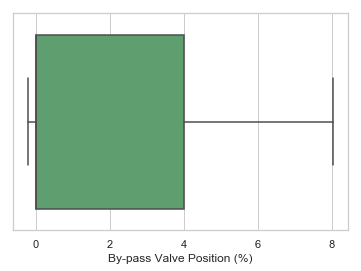

In [97]:

sns.set(style='whitegrid')
sns.boxplot(data['By-pass Valve Position (%)'],color='g')

- No Outliers
- Ranging from -0.2 from 8.02.
- Can't drop this column as there are various unique values 
- There is a chance that Discharge Pressure is dependent on Valve Position.

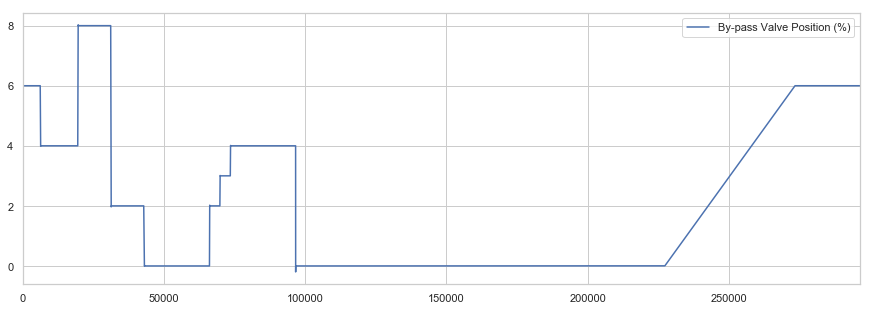

In [98]:
data['By-pass Valve Position (%)'].plot(legend=True, figsize=(15,5))

Text(0.5, 1.0, 'CORRELATION')

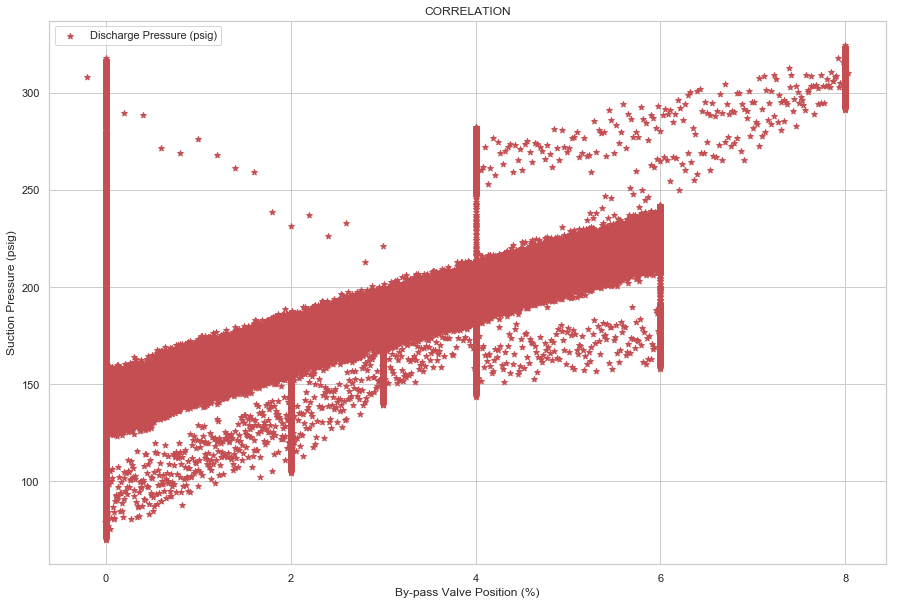

In [99]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(data['By-pass Valve Position (%)'],data['Discharge Pressure (psig)'],color='r',marker='*')
#plt.plot(data['Discharge Pressure (psig)'], label='Discharge')
plt.legend(loc=2)
plt.xlabel('By-pass Valve Position (%)')
plt.ylabel('Suction Pressure (psig)')
plt.title('CORRELATION')

### We can Drop Run Status!!

- All the values are Nan.

In [100]:
data.drop('Run Status',axis=1,inplace=True)
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


### Spliting the Dataset on Dependent and Independent Variables.

In [101]:
data.columns

Index(['Timestamp', 'Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Pressure (psig)', 'Discharge Temperature (F)'],
      dtype='object')

In [102]:


# Independent Variables:

x=data[['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Temperature (F)']]

## Not including the Timestamp: As it will show datatype Error.
# And also time will not contribute to prssure estimation with 4 values for a single minute.

## Dependent Variables:

y=data[['Discharge Pressure (psig)']]

In [103]:
x.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,-227.614448
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,-228.668636
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,-227.755324
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,-228.489113
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,-227.971795


In [104]:
y.head()

,Discharge Pressure (psig)
0,226.044931
1,217.150974
2,226.054086
3,226.016182
4,227.769383


### Splitting the dataset into Training and Testing Dataset:

In [105]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=10)
# Initializing random_state for constant results

# train_x = data excluding the target Variable.
# train_y = data consisting only target variable(Here Discharge Pressure)

# test_x = data on which model will be fit. (20% of whole data excluding target Variable)
# test_y = data on which predictions will be tested (20% only containing Discharge Pressure Values)



In [106]:
print("Length of training dataset x : ",len(train_x))
print("Length of training dataset y : ",len(train_y))
print("Length of test dataset x : ",len(test_x))
print("Length of test dataset y : ",len(test_y))

Length of training dataset x :  237160
Length of training dataset y :  237160
Length of test dataset x :  59290
Length of test dataset y :  59290


### Training Data:

In [107]:
train_x.head(2)   # Independent data
   

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
230867,576.388338,-234.273994,8407.194505,2985.676067,0.460807,-232.492869
238944,587.812626,-233.470696,8448.233898,3004.590103,1.512500,-231.676465


In [108]:
train_y.head(2)

,Discharge Pressure (psig)
230867,139.280168
238944,155.893287


### Testing Data:

In [109]:
test_x.head(2)    # Testing Independent data


,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
226519,577.141110,-234.075645,8543.050617,2996.076920,0.0,-232.276881
61749,556.072736,-237.697527,8795.739335,2948.736966,0.0,-235.911742


In [110]:
test_y.head(2)

,Discharge Pressure (psig)
226519,128.692843
61749,90.439832


### Data is prepared for making a model.

### Let's Try some plots and try to gain some insights.

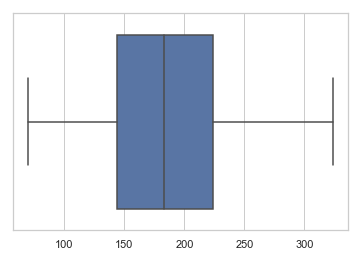

In [111]:

# Let's visualize the distribution of training data

sns.boxplot(train_y)

In [112]:
print("Minimum Value of Discharge Pressure (psig) : ",test_x.min())
print("Maximum Value of Discharge Pressure (psig) : ",test_x.max())

Minimum Value of Discharge Pressure (psig) :  Suction Pressure (psig)       5.524252e+02
Suction Temperature (F)      -2.385944e+02
Total Flow (gpm)              7.056190e+03
Speed (rpm)                   2.835754e+03
By-pass Valve Position (%)   -1.280000e-15
Discharge Temperature (F)    -2.368146e+02
dtype: float64
Maximum Value of Discharge Pressure (psig) :  Suction Pressure (psig)        646.395791
Suction Temperature (F)       -223.440491
Total Flow (gpm)              8975.952884
Speed (rpm)                   3090.364409
By-pass Valve Position (%)       8.000000
Discharge Temperature (F)     -221.623821
dtype: float64


### So clearly we can see the expansion of the Dependent Variable.

### Let's try Pairplot

- Reference:
https://seaborn.pydata.org/generated/seaborn.pairplot.html

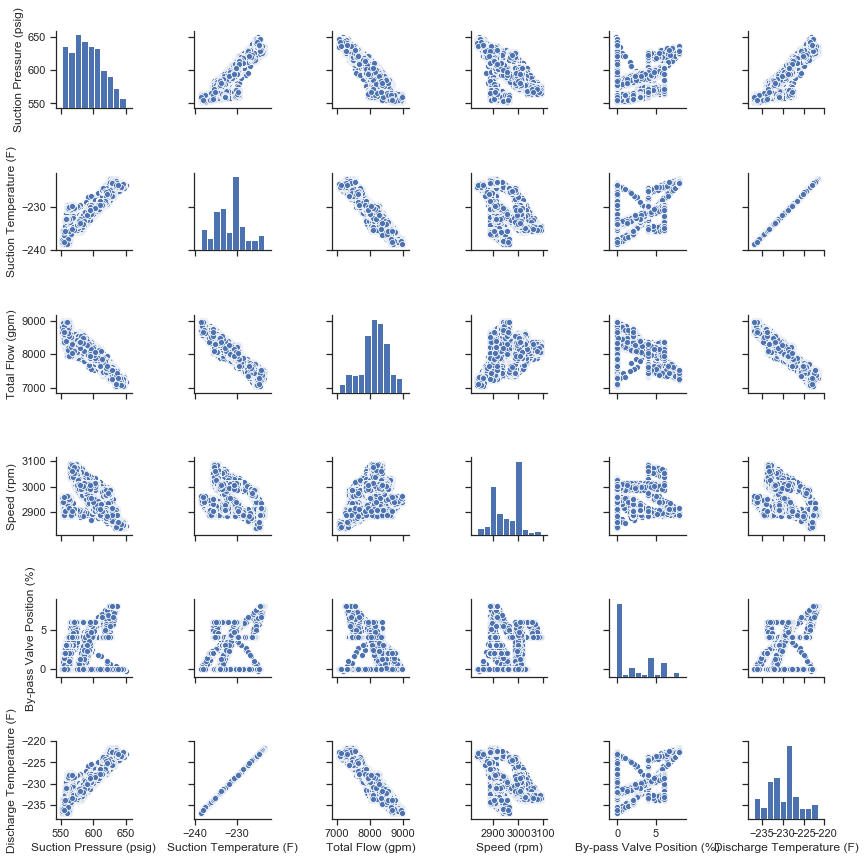

In [113]:
#sns.set_style("whitegrid");
sns.set(style="ticks",color_codes=True)
sns.pairplot(train_x, height=2)
plt.show()

### There are some strong Correlations in data.

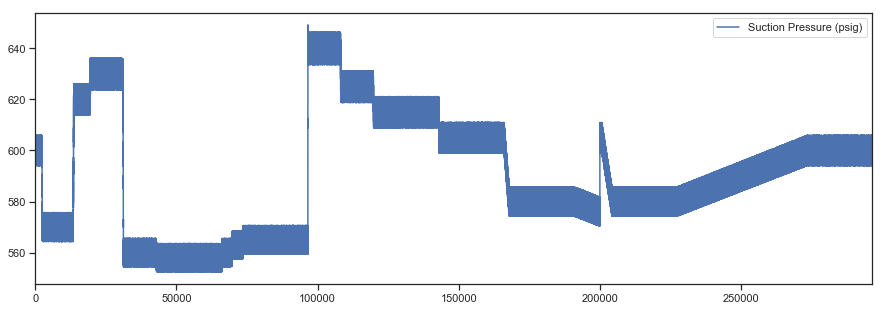

In [114]:
data['Suction Pressure (psig)'].plot(legend=True, figsize=(15,5))  # legend provides Tags.
#plt.xlabel('Years')
#plt.ylabel('Closing Price')
#plt.title('RIL Closing Price Timeline')

Text(0.5, 1.0, 'Discharge and Suction Pressure')

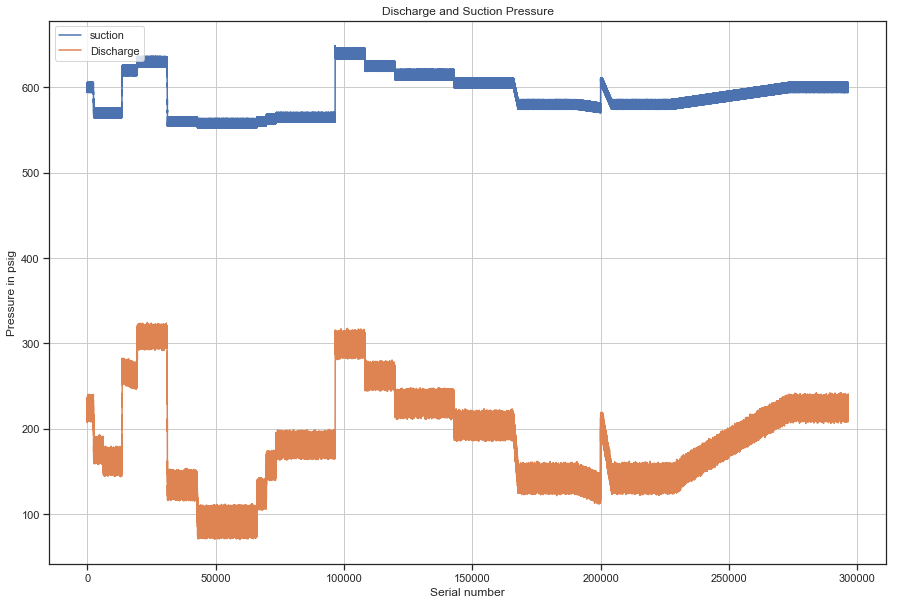

In [115]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(data['Suction Pressure (psig)'],label='suction')
plt.plot(data['Discharge Pressure (psig)'], label='Discharge')
plt.legend(loc=2)
plt.ylabel('Pressure in psig')
plt.xlabel('Serial number')
plt.title('Discharge and Suction Pressure')

### Clearly they have a same pattern.

- And Suction pressure is greater than the Discharge pressure.

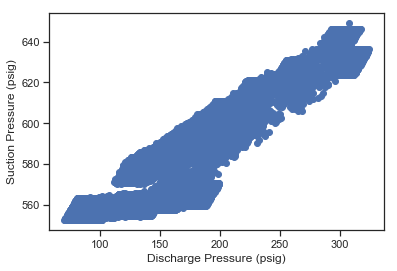

In [116]:
b=data['Suction Pressure (psig)']
a=data['Discharge Pressure (psig)']
plt.scatter(a,b)
plt.ylabel("Suction Pressure (psig)")
plt.xlabel("Discharge Pressure (psig)")
plt.show()

In [117]:
#train_x.drop('Timestamp',axis=1,inplace=True)

In [118]:
data.drop('Timestamp',axis=1,inplace=True)

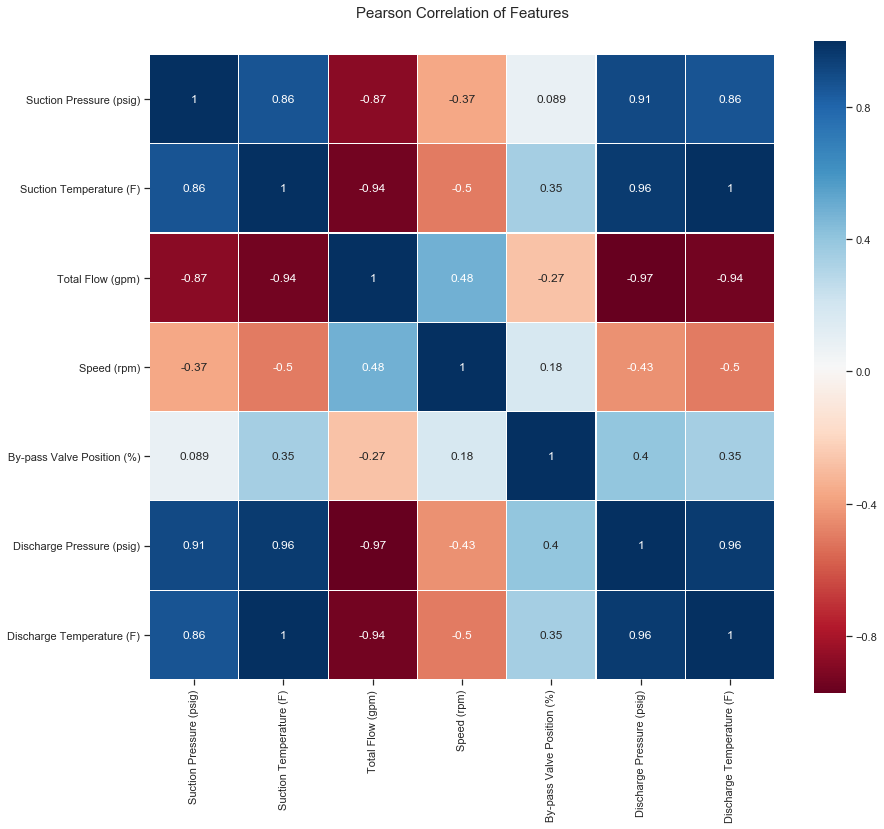

In [119]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Let's Straight away implement Linear Regression using Sklearn.

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
clr=LinearRegression()
clr.fit(train_x,train_y)
y_pred=clr.predict(test_x)
print(len(y_pred))



59290


In [122]:
clr.score(test_x,test_y)

0.9980697718448397

In [123]:
### A CLear Case of Overfitting.

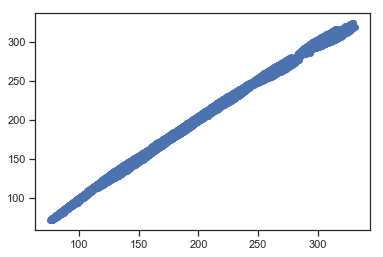

In [124]:
plt.scatter(y_pred,test_y)

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('mean squared error:',mean_squared_error(test_y,clr.predict(test_x)))
print('mean Absolute error:',mean_absolute_error(test_y,clr.predict(test_x)))
print('R squared',r2_score(test_y,clr.predict(test_x)))

mean squared error: 6.11291165207288
mean Absolute error: 1.8908518676543575
R squared 0.9980697718448397


### Let's do K-Fold CV

In [126]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.99806977, 0.99808675, 0.99810215, 0.99806922])

### We are recieving more than 99% score all the time.

### Let's Try SGDRegressor!!

C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


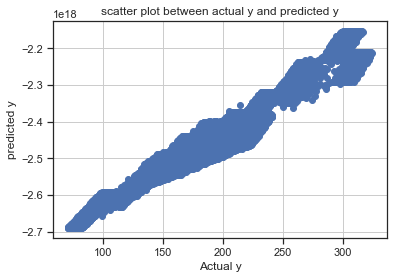

mean squared error: 6.034770940470873e+36
mean Absolute error: 2.454031178870503e+18
R squared -1.905554250124019e+33


In [127]:
#Sklearn SGD classifier





from sklearn.linear_model import SGDRegressor

clf= SGDRegressor(alpha=0.8,l1_ratio=0.3,eta0=0.04,
                   learning_rate='constant',loss='squared_loss',fit_intercept=True,random_state=10)


clf.fit(train_x,train_y)  

# Scatter plot command
plt.scatter(test_y,clf.predict(test_x))     

# for grid lines
plt.grid()                                  

# label and titles(Just like matlab)
plt.xlabel('Actual y')                  
plt.ylabel('predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()


print('mean squared error:',mean_squared_error(test_y,clf.predict(test_x)))
print('mean Absolute error:',mean_absolute_error(test_y,clf.predict(test_x)))
print('R squared',r2_score(test_y,clf.predict(test_x)))

- **Decison tree Regressor :**
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

- **LASSO (Least Absolute Shrinkage Selector Operator)** 

- lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model.


### Now will try to find out the best Model:

In [128]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.998101,{'normalize': True}
1,lasso,0.997914,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.998922,"{'criterion': 'mse', 'splitter': 'best'}"


## Insights:

1. Results are pretty great.
2. SGDRegressor has less Mean Squared Error.
3. The graph between Predicted and Actual dependent values is quite similar.
4. According to GridSearch results the best suitable model is : **Decision Tree**



### Let's Build the Decision Tree Model:

In [129]:
reg=DecisionTreeRegressor(max_depth=20,random_state=10,min_samples_split=7)
reg.fit( train_x, train_y)
y_p = reg.predict(test_x )
print(reg.score(test_x,test_y))
print('mean squared error:',mean_squared_error(test_y,y_p))

0.9990560391504889
mean squared error: 2.9894648778436936


In [130]:
# {'criterion': 'mse',
#  'max_depth': None,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'presort': False,
#  'random_state': 10,
#  'splitter': 'best'}

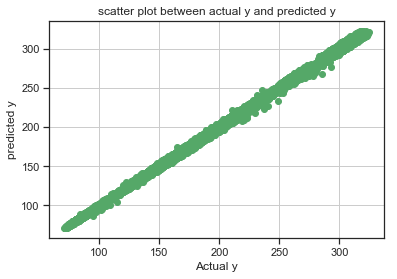

mean squared error: 2.9894648778436936
mean Absolute error: 1.346193313470571
R squared 0.9990560391504889


In [131]:
## Will plot the predicted values along with the Actual Values.
plt.scatter(test_y,y_p,color='g',marker='o')     

# for grid lines
plt.grid()                                  

# label and titles(Just like matlab)
plt.xlabel('Actual y')                  
plt.ylabel('predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()


print('mean squared error:',mean_squared_error(test_y,y_p))
print('mean Absolute error:',mean_absolute_error(test_y,y_p))
print('R squared',r2_score(test_y,y_p))

### The Root Mean Sqaured Error :

In [132]:

from math import sqrt

rms = sqrt(mean_squared_error(test_y,y_p))
print("The Root Mean Squared Error(RMSE) is : ",rms)

The Root Mean Squared Error(RMSE) is :  1.7290069050884944


### PERFECT

### Let's build the function for model testing:

In [133]:
x.columns

Index(['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Temperature (F)'],
      dtype='object')

In [134]:
#get_params(self, deep=True)
reg.get_params()

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 10,
 'splitter': 'best'}

In [135]:
def predict_Discharge_pressure(Suction_Pressure,Suction_Temperature,
       Total_Flow,Speed,Valve_Position,
       Discharge_Temperature ):    
    loc_index = [0][0]

    u = np.zeros(len(x.columns))
    u[0] = Suction_Pressure
    u[1] = Suction_Temperature
    u[2] = Total_Flow
    u[3] = Speed
    u[4] = Valve_Position
    u[5] = Discharge_Temperature 
    if loc_index >= 0:
        u[loc_index] = 1

    return reg.predict([u])[0]
# Will return an array. threfore [0] is there for returning the first element of that array. 

In [136]:

# These values are the first entry of the Dataset:
# Let's see how our model works
predict_Discharge_pressure(596.100853,-229.436683,7925.800487,2999.411045,6.0,-227.614448)

185.01166990000002

In [137]:
predict_Discharge_pressure(596.838217,-230.453708,8085.917724,2989.706617,6.0,-228.668636)

175.151634225

In [138]:
predict_Discharge_pressure(595.669526,-230.493843,8151.621431,3006.425541,6.0,-228.692008)

170.21288643999998

In [139]:
predict_Discharge_pressure(607.654333,-230.45,8036.987733,2927.779828,0,-228.656531)

155.6983487

In [140]:
coeff=clr.coef_
coeff

array([[ 0.9069173 ,  0.66585032, -0.07042414, -0.06456755,  4.96525627,
         0.28965219]])

### Generating the pickle file:

In [141]:
import pickle
with open('Discharge_pressure.pickle','wb') as f:
    pickle.dump(reg,f)

### Exporting it to the json file:

In [142]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))